# Skup belog vina
### Ucitavanje podataka

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [82]:
np.random.seed(7)

In [83]:
data_white=pd.read_csv('winequality-white.csv',delimiter=';') #ucitavanje parametara belog vina

In [84]:
data_white.head() #prvih 5, izgled tabele

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [85]:
y_white=data_white['quality'] #ciljna promenljiva, uzima vrednosti od 1-10, ocena kvaliteta vina

In [86]:
y_white.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [87]:
x_white=data_white.drop(labels='quality',axis=1) #vrednosti atributa

In [88]:
x_white.head()  #prvih 5 instanci

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [89]:
data_white.isnull().any() #nema nula elemeneta, nepopunjenih

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [90]:
len(data_white) #broj instanci

4898

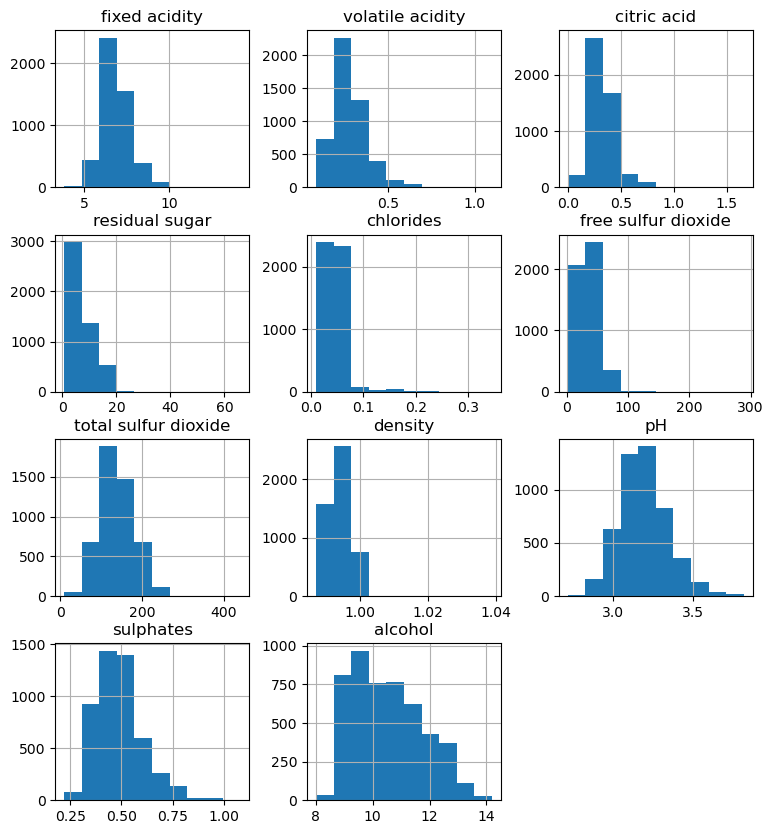

In [91]:
x_white.hist(figsize=(9,10)) # raspodele vrednosti po atributima
plt.savefig('raspodele_atributa.png')
plt.show()

In [92]:
len(x_white.columns) # broj kolona, broj atributa

11

In [93]:
imena_kolona=x_white.columns.to_series #imena kolona
imena_kolona

<bound method Index.to_series of Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')>

In [94]:
data_white.info() #informacije o promenljivim, kog su tipa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [95]:
data_white.describe() #sredina, min, max svih promenljivih u skupu podataka

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


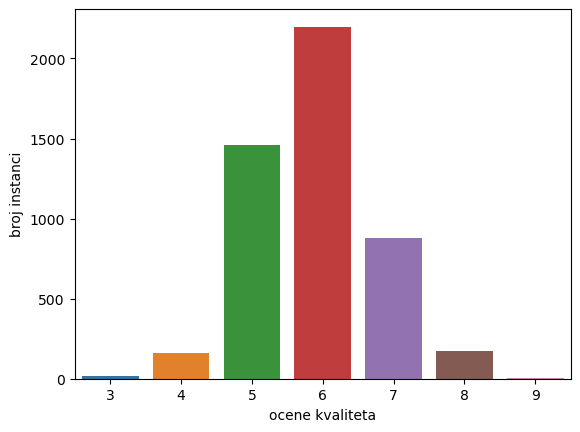

In [96]:

sns.countplot(x ='quality', data = data_white)
plt.xlabel('ocene kvaliteta')
plt.ylabel('broj instanci')
plt.savefig('raspodela_y.png')
plt.show() #histogram kako su rasporedjenje ocene kvaliteta belog vina, vidimo da nije balansirana raspodela

iz ovoga vidimo da najvise ima srednjih ocena vina,
malo je odlicnih vina (ocena 8,9), a malo je i losih vina (ocena 3,4)

In [97]:
data_white['quality'].value_counts() #raspodela po ocenama kvaliteta

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [98]:
data_white.shape #4898 instanci, 12 kolona

(4898, 12)

In [99]:
matrica_korelacije=data_white.corr() 
matrica_korelacije            #matrica korelacije

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


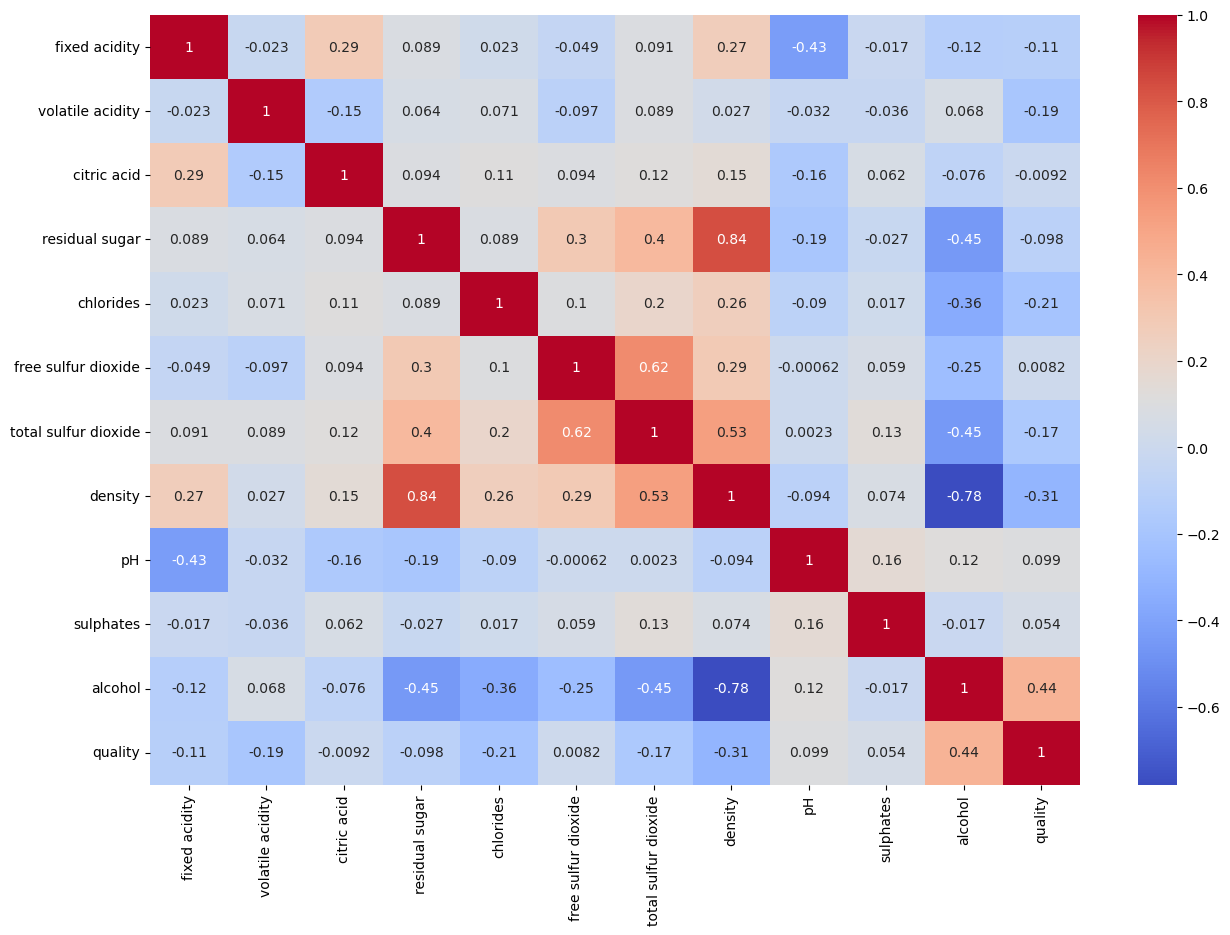

In [100]:
#plt.imshow(matrica_korelacije)
plt.subplots(figsize=(15, 10))
sns.heatmap(matrica_korelacije, annot = True, cmap = 'coolwarm')
plt.savefig('matrica_konfuzije.png')
plt.show() #heatmapa korelacija

vidimo ih heatmape visoku povezanost density i residual sugar, kao i density i alcohol ali suprotno korelisano
takodje vidimo poveznaost atributa sa ciljnom promenljivom

In [101]:
def korelacija(value, threshold=0.5):
    if np.abs(value) < threshold:
        return 0
    else:
        return value # da prikaze visoko korelisane

In [102]:
matrica_korelacije.applymap(korelacija)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
volatile acidity,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
citric acid,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
residual sugar,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.838966,0.0,0.0,0.000000,0.0
chlorides,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
free sulfur dioxide,0.0,0.0,0.0,0.000000,0.0,1.000000,0.615501,0.000000,0.0,0.0,0.000000,0.0
total sulfur dioxide,0.0,0.0,0.0,0.000000,0.0,0.615501,1.000000,0.529881,0.0,0.0,0.000000,0.0
density,0.0,0.0,0.0,0.838966,0.0,0.000000,0.529881,1.000000,0.0,0.0,-0.780138,0.0
pH,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0
sulphates,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0


In [103]:
x_white.columns #imena kolona

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

#### podela skupa

In [104]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_white,y_white,test_size=0.2,random_state=7,stratify=y_white)

In [105]:
x_train.shape

(3918, 11)

In [106]:
x_test.shape

(980, 11)

In [107]:
y_train.shape

(3918,)

In [108]:
y_test.shape

(980,)

#### standardizacija

In [109]:
scaler=preprocessing.StandardScaler()

In [110]:
scaler.fit(x_train)

StandardScaler()

In [111]:
x_train=scaler.transform(x_train)

In [112]:
x_test=scaler.transform(x_test)

In [113]:
y_white.shape

(4898,)

## KNN (K najblizih suseda)

In [377]:
#Uzimamo za k brojeve od 1-40
k = range(1, 35)
k_cross_val_scores = []
k_val_scores = []
#delim na trening i validacioni skup
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=7)
for k in k:
    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # kros validacija 10 slojeva
    # tacnost
    cross_val_scores = model_selection.cross_val_score(knn_model, x_train, y_train, cv=10, scoring='accuracy')
    k_cross_val_scores.append(cross_val_scores.mean()) #srednja vrednost
    
    # fitovanje na trening skupu i evaluacija na validacionom skupu
    knn_model.fit(x_train, y_train)
    val_score = knn_model.score(x_val, y_val)
    k_val_scores.append(val_score)

In [378]:
k_val_scores

[0.4320388349514563,
 0.39805825242718446,
 0.45145631067961167,
 0.47572815533980584,
 0.45145631067961167,
 0.4368932038834951,
 0.470873786407767,
 0.4563106796116505,
 0.4368932038834951,
 0.4368932038834951,
 0.46116504854368934,
 0.44660194174757284,
 0.4320388349514563,
 0.441747572815534,
 0.46116504854368934,
 0.470873786407767,
 0.46601941747572817,
 0.49029126213592233,
 0.49029126213592233,
 0.49029126213592233,
 0.5,
 0.5048543689320388,
 0.49029126213592233,
 0.5048543689320388,
 0.47572815533980584,
 0.49514563106796117,
 0.5097087378640777,
 0.5145631067961165,
 0.5048543689320388,
 0.5097087378640777,
 0.5048543689320388,
 0.5194174757281553,
 0.5097087378640777,
 0.5145631067961165]

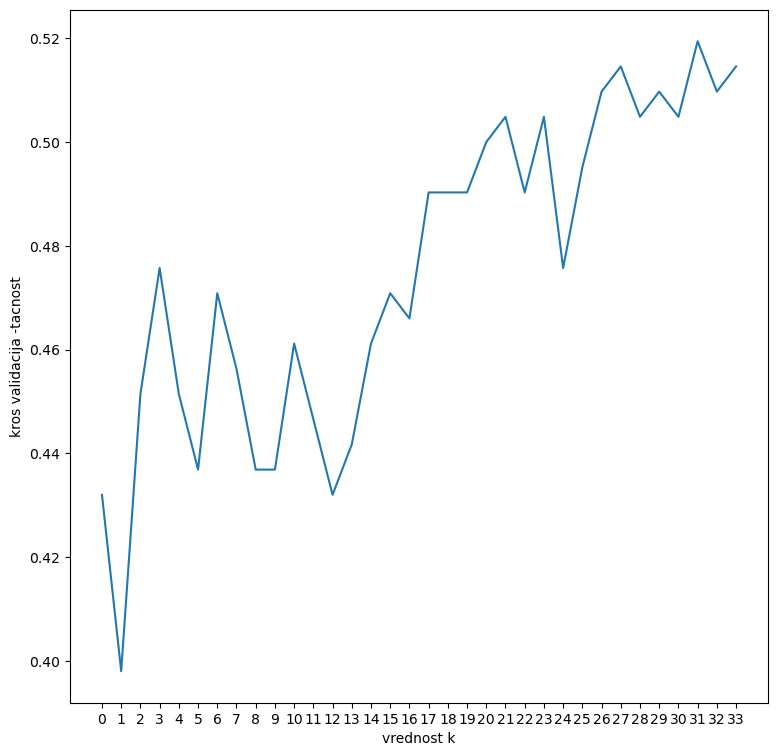

In [379]:
plt.figure(figsize=(9,9))
plt.plot(range(k),k_val_scores)
plt.xticks(range(k))
plt.xlabel('vrednost k')
plt.ylabel('kros validacija -tacnost')
plt.savefig('knn.png')
plt.show()

Izabracu k=31 za obucavanje modela, kako sam tu dobila tacnost medju visim

In [390]:
knn_model = KNeighborsClassifier(n_neighbors=31) #treniranje modela za k=31

knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=31)

In [391]:
y_pred = knn_model.predict(x_test) #predvijdanje modela na test skupu

In [392]:
y_pred

array([5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       7, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 7, 5,

In [393]:
print(metrics.classification_report(y_test, y_pred)) #izvestaj

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        33
           5       0.60      0.38      0.46       291
           6       0.50      0.84      0.62       440
           7       0.51      0.15      0.24       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.52       980
   macro avg       0.23      0.20      0.19       980
weighted avg       0.49      0.52      0.46       980



In [394]:
tacnost_knn=metrics.accuracy_score(y_test,y_pred) #tacnost modela
tacnost_knn

0.5163265306122449

## Linearna regresija sa tezinama

In [42]:
lm=linear_model.LinearRegression()

In [254]:
from sklearn.utils.class_weight import compute_sample_weight
w4=compute_sample_weight(class_weight='balanced', y=y_train) #tezina da pridaje vise vaznosti manjim klasama

In [255]:
broj_klasa = y_train.value_counts(normalize=True) #broji instance

In [256]:
w5 = {oznaka_klase: 1 / broj_klasa[oznaka_klase] for oznaka_klase in broj_klasa.index} #tezina drugi nacin

In [268]:
lm.fit(x_train,y_train,sample_weight=w4)

LinearRegression()

In [269]:
#lm.fit(x_train,y_train,sample_weight=y_train.map(w5))

In [270]:
y_predd=lm.predict(x_test)

In [271]:
y_predd

array([ 4.08115525,  4.52428258,  5.18227995,  6.89536727,  5.09799986,
        4.70135687,  6.14466677,  6.20308792,  5.80913184,  6.1953907 ,
        6.53714641,  7.22785907,  8.20727467,  6.77569959,  3.70539385,
        7.56216568,  5.56414566,  5.73962646,  6.31975025,  6.60539326,
        7.90683124,  4.90779869,  7.31399565,  6.73017285,  4.64914529,
        5.78879152,  5.98006473,  5.07444615,  5.17958196,  3.01838605,
        4.36564404,  7.30465162,  7.52163142,  7.48074525,  6.2281206 ,
        5.96940954,  6.22709134,  5.14211614,  5.64380663,  8.02306322,
        6.53636347,  4.79131596,  5.59930235,  7.51858308,  5.81566794,
        6.23717338,  3.08597781,  4.68449843,  6.81329084,  4.81384071,
        3.71518309,  4.98128018,  5.25062149,  3.63793384,  5.5903406 ,
        6.89357894,  4.57605984,  6.00158614,  7.42886578,  6.7112502 ,
        6.76299036,  4.50306279,  5.22082322,  6.12380904,  5.89692008,
        6.9062064 ,  4.54928192,  7.2310417 ,  4.95584822,  7.85

In [272]:
y_predd=y_predd.round()
y_predd

array([ 4.,  5.,  5.,  7.,  5.,  5.,  6.,  6.,  6.,  6.,  7.,  7.,  8.,
        7.,  4.,  8.,  6.,  6.,  6.,  7.,  8.,  5.,  7.,  7.,  5.,  6.,
        6.,  5.,  5.,  3.,  4.,  7.,  8.,  7.,  6.,  6.,  6.,  5.,  6.,
        8.,  7.,  5.,  6.,  8.,  6.,  6.,  3.,  5.,  7.,  5.,  4.,  5.,
        5.,  4.,  6.,  7.,  5.,  6.,  7.,  7.,  7.,  5.,  5.,  6.,  6.,
        7.,  5.,  7.,  5.,  8.,  6.,  6.,  4.,  7.,  6.,  6.,  4.,  6.,
        7.,  4.,  7.,  6.,  6.,  5.,  6.,  5.,  8.,  5.,  7.,  6.,  7.,
        9.,  6.,  5.,  6.,  7.,  7.,  5.,  6.,  5.,  8.,  6.,  6.,  6.,
        7.,  7.,  4.,  7.,  6.,  6.,  6.,  7.,  8.,  7.,  7.,  7.,  5.,
        7.,  5.,  8.,  6.,  5.,  6.,  5.,  7.,  7.,  7.,  6.,  6.,  6.,
        5.,  8.,  5.,  7.,  5.,  6.,  8.,  6.,  6.,  7.,  5.,  6.,  6.,
        6.,  6.,  4.,  6.,  4.,  5.,  5.,  5.,  6.,  4.,  6.,  6.,  5.,
        4.,  7.,  5.,  7.,  7.,  6.,  8.,  5.,  6.,  6.,  6.,  5.,  5.,
        7.,  5.,  6.,  5.,  6.,  5.,  4.,  8.,  6.,  4.,  4.,  6

In [273]:
metrics.mean_squared_error(y_test,y_predd)

1.2948979591836736

In [274]:
metrics.mean_absolute_percentage_error(y_test,y_predd)

0.14445254292193066

In [275]:
metrics.r2_score(y_test,y_predd)

-0.6495384125636672

In [278]:
print(metrics.accuracy_score(y_test,y_predd)) #tacnost

0.376530612244898


In [277]:
print(metrics.classification_report(y_test, y_predd))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         0
         3.0       0.09      0.25      0.13         4
         4.0       0.14      0.39      0.21        33
         5.0       0.46      0.35      0.40       291
         6.0       0.52      0.40      0.45       440
         7.0       0.29      0.42      0.34       176
         8.0       0.07      0.11      0.09        35
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0

    accuracy                           0.38       980
   macro avg       0.16      0.19      0.16       980
weighted avg       0.43      0.38      0.39       980



## AdaBoost

Ada boost je model koji se zasniva na promenljivim tezinama instanci. Prvo se pravi bazni model.

In [244]:
from sklearn.tree import DecisionTreeClassifier #dodato stablo odlucivanja
base_estimator = DecisionTreeClassifier(max_depth=10) #izabrana dubina 10

In [245]:
#pravljenje ansambla
adaboost = ensemble.AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50,random_state=7)

In [246]:
# treniranje modela 
adaboost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   random_state=7)

In [247]:
# predvidjanje na test skupu 
y_preddd = adaboost.predict(x_test)

In [248]:
print(metrics.classification_report(y_test, y_preddd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.40      0.12      0.19        33
           5       0.71      0.59      0.65       291
           6       0.61      0.81      0.70       440
           7       0.63      0.48      0.55       176
           8       0.90      0.26      0.40        35
           9       0.00      0.00      0.00         1

    accuracy                           0.64       980
   macro avg       0.47      0.32      0.35       980
weighted avg       0.65      0.64      0.62       980



In [249]:
print(metrics.confusion_matrix(y_test,y_preddd))

[[  0   0   0   3   1   0   0]
 [  0   4  17  11   1   0   0]
 [  0   5 173 110   3   0   0]
 [  0   1  48 356  35   0   0]
 [  0   0   4  86  85   1   0]
 [  0   0   0  18   8   9   0]
 [  0   0   0   0   1   0   0]]


In [250]:
print(metrics.accuracy_score(y_test,y_preddd)) #tacnost

0.639795918367347


In [251]:
metrics.mean_squared_error(y_test,y_preddd)

0.5244897959183673

In [252]:
metrics.r2_score(y_test,y_preddd)

0.33186544991511036

In [253]:
metrics.mean_absolute_percentage_error(y_test,y_preddd)

0.0739731130547457

### Multinomijalna logisticka regresija

In [63]:
mlr=linear_model.LogisticRegression(multi_class='multinomial',max_iter=1000,solver='newton-cg')

In [64]:
mlr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [65]:
y_predddd=mlr.predict(x_test)

In [66]:
y_predddd

array([5, 6, 6, 7, 6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5,
       7, 5, 5, 6, 6, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 7,
       6, 6, 4, 4, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 7, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 7, 5,
       6, 5, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6,
       6, 5, 7, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5,
       7, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 7, 6, 6, 6,
       6, 6, 6, 7, 6, 5, 6, 7, 6, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 6,
       5, 6, 5, 6, 5, 6, 6, 5, 7, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 6, 6,
       7, 5, 5, 6, 5, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 7, 6, 6, 6, 6, 5, 7, 6, 6, 6, 7, 7, 5,

In [67]:
print(metrics.confusion_matrix(y_test,y_predddd))

[[  0   0   1   3   0   0   0]
 [  0   3  19  10   1   0   0]
 [  0   1 162 125   2   1   0]
 [  0   2  79 324  35   0   0]
 [  0   0   6 128  42   0   0]
 [  0   0   1  23  11   0   0]
 [  0   0   0   0   1   0   0]]


In [68]:
print(metrics.classification_report(y_test,y_predddd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.09      0.15        33
           5       0.60      0.56      0.58       291
           6       0.53      0.74      0.62       440
           7       0.46      0.24      0.31       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.30      0.23      0.24       980
weighted avg       0.52      0.54      0.51       980



In [69]:
metrics.mean_squared_error(y_test,y_predddd)

0.6448979591836734

In [70]:
metrics.r2_score(y_test,y_predddd)

0.1784804753820034

In [71]:
metrics.mean_absolute_percentage_error(y_test,y_predddd)

0.0899546485260771